# Cluster Visualisation with FastText

In [1]:
#import packages for clustering 
from whatlies import Embedding, EmbeddingSet
from whatlies.language import FasttextLanguage, SpacyLanguage

In [2]:
#import FastText language model 
lang_ft = FasttextLanguage("cc.en.300.bin")

In [3]:
# setting paris to explore 
stereotype_pairs = [
    ('carpentry', 'sewing'),
    ('physician', 'nurse'),
    ('surgeon', 'nurse'),
    ('doctor', 'nurse'),
    ('programmer', 'homemaker'),   
    ('mechanic', 'hairdresser'),
    ('conservatism', 'feminism'),
    ('architect', 'designer'),
    ('shopkeeper', 'housewife'),
    ('brilliant', 'lovely'),
    ('scientist', 'receptionist'),
    ('philosopher', 'librarian'),
]

appropriate_pairs = [
    ('man', 'woman'),
    ('king', 'queen'),
    ('brother', 'sister'),
    ('father', 'mother'),
    ('he', 'she'),
    ('him', 'her'),
    ('boy', 'girl'),
]

random_pairs = [
    ('dog', 'cat'),
    ('carpet', 'leg'),
    ('hot', 'cold'),
    ('high', 'low'),
    ('strong', 'soft'),
    ('inside', 'outside'),
    ('house', 'face'),
]

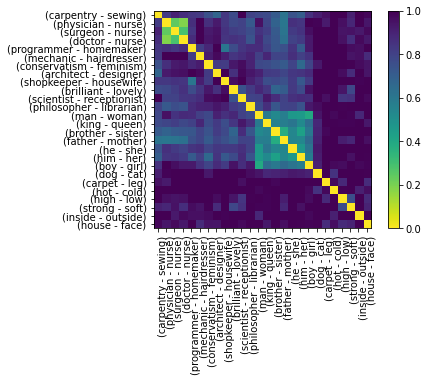

In [4]:
#making the co-similarity matrix 
flatten = lambda l: [item for sublist in l for item in sublist]
pairs=[stereotype_pairs, appropriate_pairs, random_pairs]

def calc_axis(pair_list, language_model):
    return [language_model[t1] - language_model[t2] for (t1, t2) in pair_list]

def make_distance_plot(language_model):
    emb_pairs = EmbeddingSet(*flatten([calc_axis(p, language_model) for p in pairs]))
    emb_pairs.plot_distance(metric="cosine")
    
make_distance_plot(language_model=lang_ft)

# Making TSNE plot with word2vec model 

In [5]:
# load packages 
import cython 
from gensim.models import phrases 
from gensim import corpora, models, similarities #calc all similarities at once, from http://radimrehurek.com/gensim/tut3.html
from sklearn.metrics.pairwise import cosine_similarity
from scipy import spatial
from statistics import mean
from gensim.models import Word2Vec, KeyedVectors
import pandas as pd
from string import ascii_letters, digits
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
from gensim.test.utils import datapath

In [6]:
#define plot 
def tsne_plot(words, vectors, iterations, seed, title): 
    "Creates and TSNE model and plots it"
    tsne_model = TSNE(perplexity=5, n_components=2, init='pca', n_iter=iterations, random_state=seed) #you may need to tune these, epsecially the perplexity. #Use PCA to reduce dimensionality to 2-D, an "X" and a "Y 
    new_values = tsne_model.fit_transform(vectors)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(10, 10)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(words[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.ylabel("Latent Dimension 1") 
    plt.xlabel("Latent Dimension 2")
    plt.title(title)
    plt.show()

In [9]:
# define word2vec model 
w2vmodel = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True, limit=500000)

In [10]:
# manually define which words we want to explore 
my_word_list=[]
my_word_vectors=[]
label=[]

words_to_explore= ['woman', 'man','nurse', 'doctor', 'carpenter', 'receptionist', 'homemaker', 'physician', 'dentist', 'teacher', 'hairdresser', 'computer_scientist', 'programmer',"solicitor", "lawyer", "accountant", 'mechanic', 'pilot', 'librarian', 'manufacturer', 'scientist', 'philosopher', 'psychologist', 'electrician', 'plummer', 'concretor', 'plasterer', 'gardener', 'CEO', 'kitchenhand', 'cook', 'chef', 'housekeeper', 'packer', 'machinist', 'bookkeeper', 'artist', 'designer', 'jounalist', 'engineer', 'geologist', 'waiter', 'barista', 'waitestaff', 'shipping', 'trades' 'stockbroker', 'baker', 'cabinetmaker', 'driver', 'surgeon', 'healthcare', 'retail', 'education', 'construction', 'transport', 'service', 'accomodation', 'software', 'technical', 'arts', 'science', 'mathematics', 'business', 'painter', 'architect', 'storeperson', 'assistant', 'sales']

for i in words_to_explore:   
    try:
        if my_word_list not in my_word_list:
            my_word_vectors.append(w2vmodel.wv[i])
            my_word_list.append(i)
    except KeyError: 
        continue

/Users/carolinetvergaard/anaconda3/envs/nlp/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # This is added back by InteractiveShellApp.init_path()


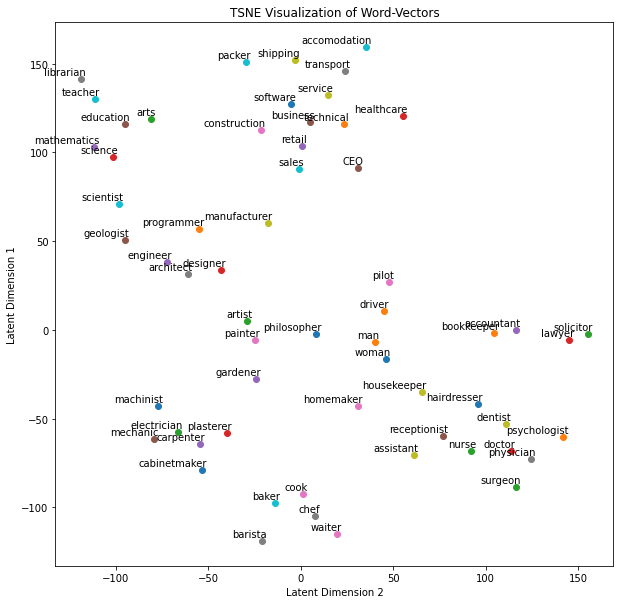

In [11]:
# TSNE plot 
tsne_plot(my_word_list, my_word_vectors, 3000, 23, "TSNE Visualization of Word-Vectors")

In [12]:
# manually define which words we want to explore 
my_word_list=[]
my_word_vectors=[]
label=[]

words_to_explore= ['nurse', 'doctor', 'carpentry', 'sewing', 'programmer', 'homemaker', 'mechanic', 'hairdresser', 'shopkeeper', 'housewife', 'scientist', 'receptionist', 'philosopher', 'librarian', 'man', 'woman', 'king', 'queen', 'father', 'mother']

for i in words_to_explore:   
    try:
        if my_word_list not in my_word_list:
            my_word_vectors.append(w2vmodel.wv[i])
            my_word_list.append(i)
    except KeyError: 
        continue

/Users/carolinetvergaard/anaconda3/envs/nlp/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # This is added back by InteractiveShellApp.init_path()


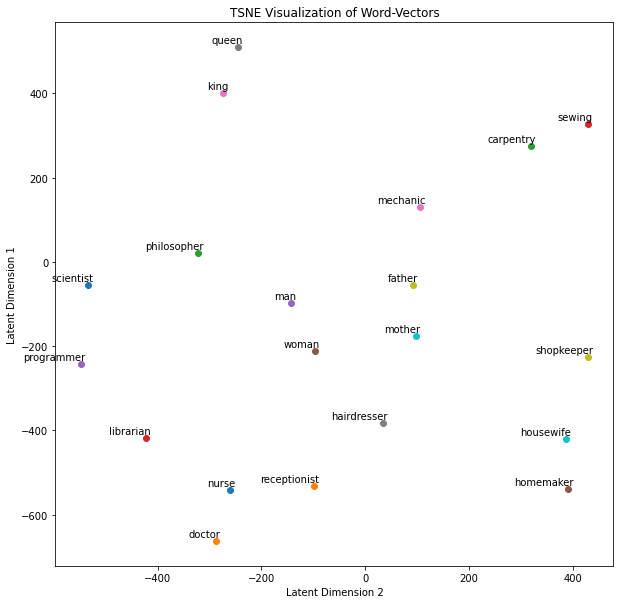

In [13]:
tsne_plot(my_word_list, my_word_vectors, 3000, 23, "TSNE Visualization of Word-Vectors")

In [ ]:
vec = model_w2v["computer_programmer"] - model_w2v["man"] + model_w2v["woman"]
model_w2v.most_similar([vec])

In [ ]:
vec = model_w2v["king"] - model_w2v["man"] + model_w2v["woman"]
model_w2v.most_similar([vec])